#**DIABETES PREDICTION**


**##1.Data Loading and Initial Processing**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pickle
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)

## **2.Loading Data**

In [18]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



## **3. Initial Data Inspection**

In [19]:
print(df.shape)
print(df.describe())
print(df.info())

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

## **4. Checking Null Values**

In [20]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



# **Exploratory Data Analysis (EDA)**

## **6.Visualizing Distributions of Numerical Columns**

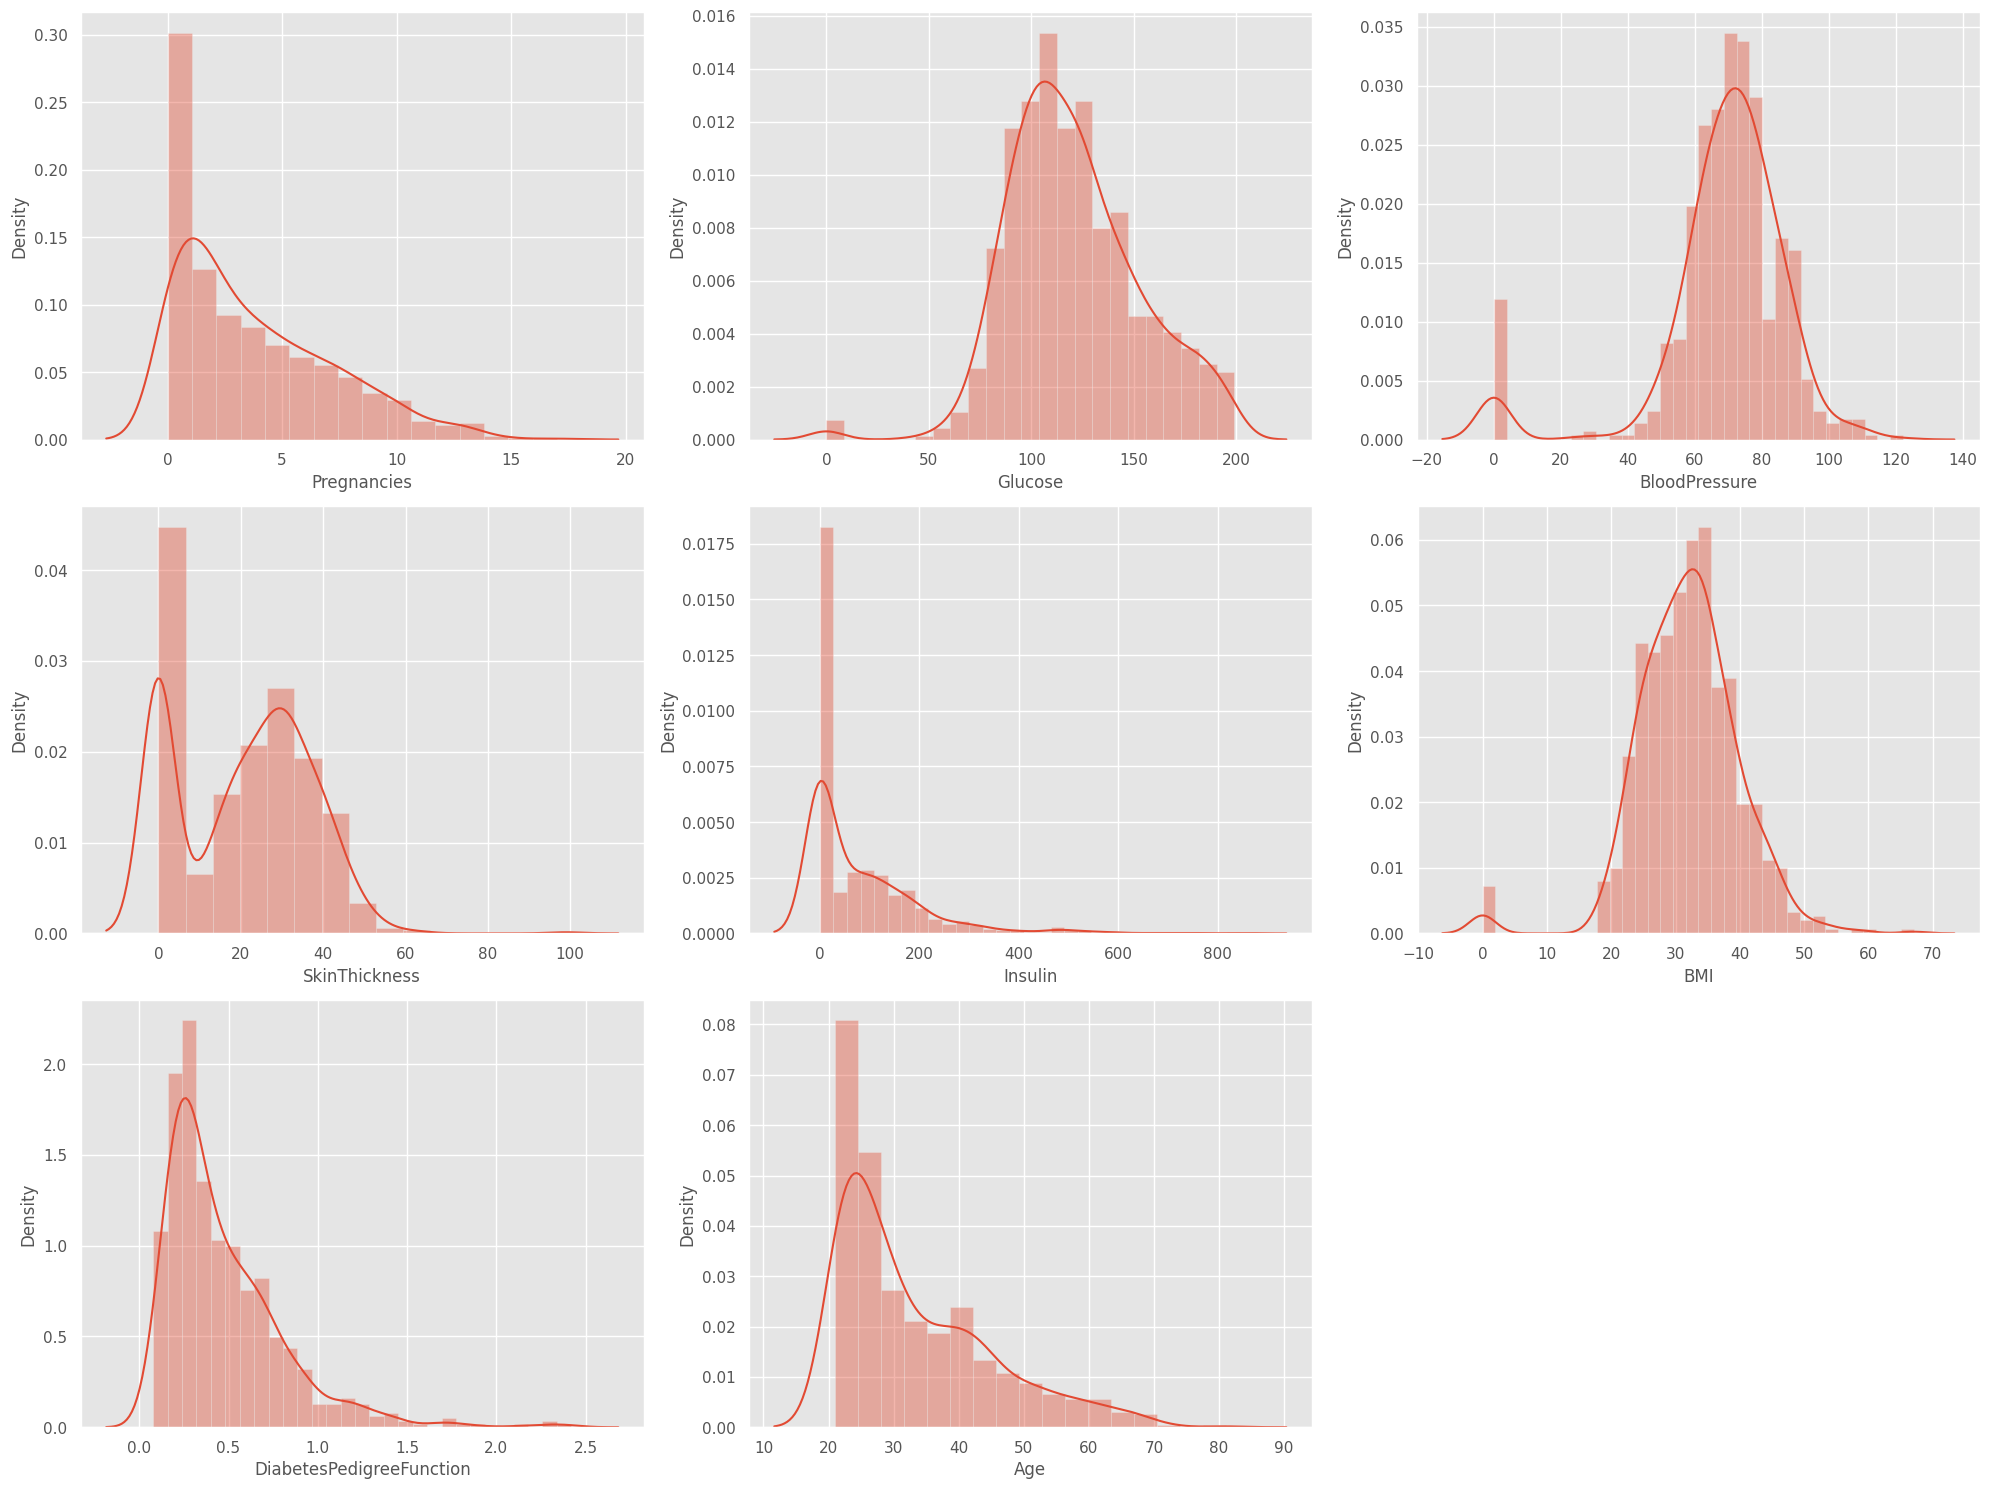

In [21]:
num_cols = df.columns[:-1]  # All columns except 'Outcome'
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1
plt.tight_layout()
plt.show()



## **7.Visualizing Outcome Count**

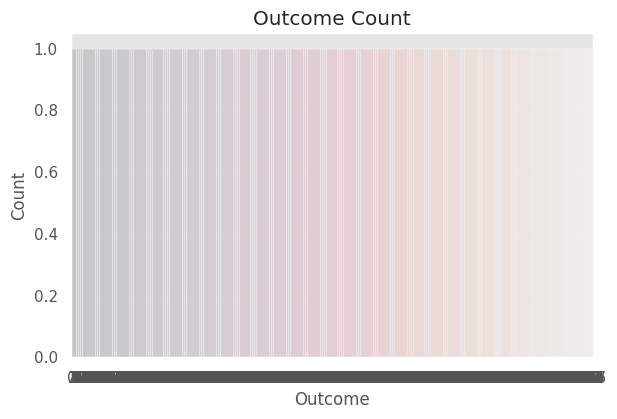

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(df['Outcome'], palette='rocket')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Count')
plt.show()

### Data Preprocessing
### Encoding Categorical Variables (if any)
### For this dataset, no categorical variables need encoding


# **Model Building**

## **8.Preparing Data for Training**

In [23]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


###**K-Nearest Neighbors (KNN)**

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of KNN: {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN: {knn_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, knn_y_pred)}")
print(f"AUC-ROC Score: {knn_auc}")

Training Accuracy of KNN: 0.7895716945996276
Test Accuracy of KNN: 0.7489177489177489
Confusion Matrix:
[[134  23]
 [ 35  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.63      0.53      0.57        74

    accuracy                           0.75       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

AUC-ROC Score: 0.7289120330521606


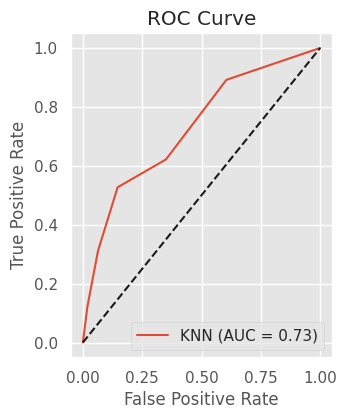

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Decision Tree**

Training Accuracy of Decision Tree: 1.0
Test Accuracy of Decision Tree: 0.7402597402597403
Confusion Matrix:
[[126  31]
 [ 29  45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.59      0.61      0.60        74

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.74      0.74       231

AUC-ROC Score: 0.7053279394043726


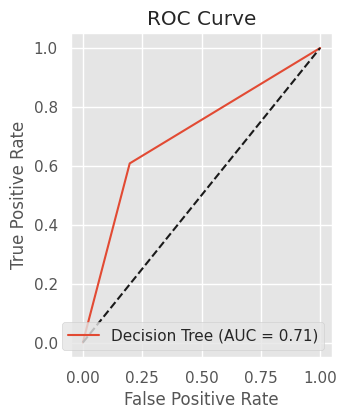

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_y_pred)
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of Decision Tree: {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree: {dtc_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, dtc_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, dtc_y_pred)}")
print(f"AUC-ROC Score: {dtc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {dtc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Random Forest**

Training Accuracy of Random Forest: 1.0
Test Accuracy of Random Forest: 0.7792207792207793
Confusion Matrix:
[[140  17]
 [ 34  40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231

AUC-ROC Score: 0.8270786710277156


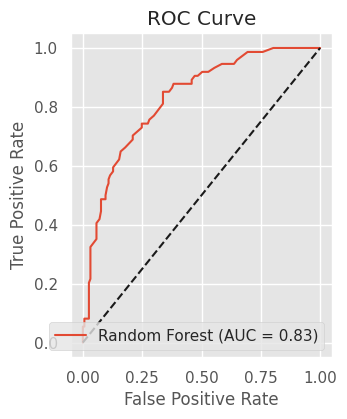

In [27]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of Random Forest: {accuracy_score(y_train, rf_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest: {rf_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, rf_y_pred)}")
print(f"AUC-ROC Score: {rf_auc}")

fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **XGBoost**

Training Accuracy of XGBoost: 1.0
Test Accuracy of XGBoost: 0.7748917748917749
Confusion Matrix:
[[132  25]
 [ 27  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       157
           1       0.65      0.64      0.64        74

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

AUC-ROC Score: 0.8030642107075229


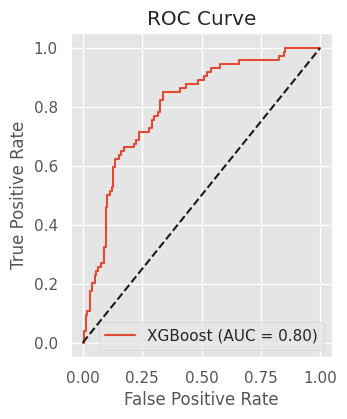

In [28]:
# XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of XGBoost: {accuracy_score(y_train, xgb_clf.predict(X_train))}")
print(f"Test Accuracy of XGBoost: {xgb_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, xgb_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, xgb_y_pred)}")
print(f"AUC-ROC Score: {xgb_auc}")

fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Model Comparison**

In [29]:
models = ['K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier']
accuracy = [knn_acc, dtc_acc, rf_acc, xgb_acc]
auc_scores = [knn_auc, dtc_auc, rf_auc, xgb_auc]

models_acc_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'AUC-ROC': auc_scores})
models_acc_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,AUC-ROC
2,Random Forest Classifier,0.779221,0.827079
3,XGBoost Classifier,0.774892,0.803064
0,K-Nearest Neighbors,0.748918,0.728912
1,Decision Tree Classifier,0.740260,0.705328


### **Saving the Random Forest Model as it had the highest accuracy in the example**

In [30]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
print(f"Accuracy of Random Forest is {round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)}%")
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

Accuracy of Random Forest is 73.16%
